(array([0.        , 0.04287388, 0.12379935, ..., 1.00087367, 1.02179388,
        1.04853776]),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'd(t)'),
 <Figure size 3000x900 with 0 Axes>)

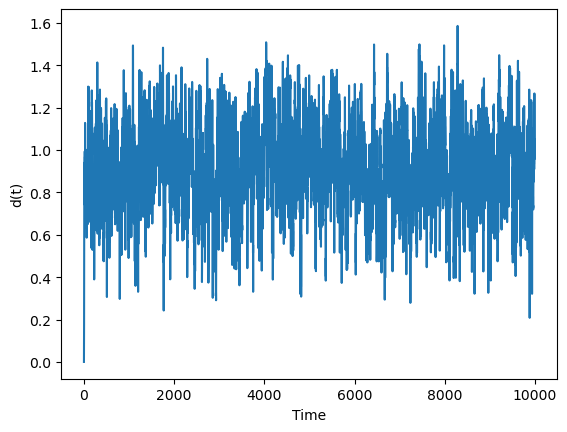

In [25]:
import numpy as np
from numpy.random import normal 
import matplotlib.pyplot as plt


def process(dt=0.1, theta=1.2,mean = 0.9, sigma = 0.3, n=10000):
    x = np.zeros(n)
    for t in range (1,n):
        x[t] = x[t-1] + theta*(mean-x[t-1])*dt + sigma * normal(0,np.sqrt(dt))
    return x, plt.plot(x), plt.xlabel('Time'), plt.ylabel('d(t)'), plt.Figure(figsize=(10,3), dpi = 300)

process()

(array([0.000e+00, 1.000e-04, 2.000e-04, ..., 9.998e-01, 9.999e-01,
        1.000e+00]),
 [1.3,
  1.2999873271403612,
  1.3003763072500045,
  1.2998376795896747,
  1.2995219601351233,
  1.2991338189942212,
  1.2995909559124974,
  1.299516803739835,
  1.2995732269073232,
  1.3001690075513717,
  1.301294071696463,
  1.3015159753754708,
  1.3023035706002752,
  1.3030480815515992,
  1.303563694394268,
  1.3032987117337476,
  1.302535605401493,
  1.3023089891392097,
  1.3033001420144494,
  1.3027397935632916,
  1.3030637770929887,
  1.303111052808956,
  1.302426126766361,
  1.302738742015272,
  1.3029097944502608,
  1.3042216525938737,
  1.3046053713337327,
  1.3045943468779904,
  1.3043045040040873,
  1.3041211621658548,
  1.303990752102588,
  1.3036922106808744,
  1.3037377344379166,
  1.3043123560853178,
  1.3042294506428864,
  1.3035238750497955,
  1.3036081320265993,
  1.303098734915136,
  1.3027675126540745,
  1.3033279020275943,
  1.3040040488240865,
  1.304285052186813,
  1.30419781

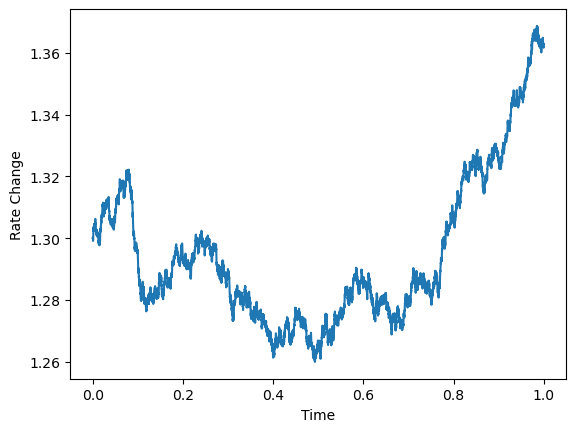

In [35]:
def vasicek_model(r0,k,theta,T=1, sigma = 0.05, n=10000):
    dt = T/n
    t = np.linspace(0,T,n+1)
    rates =[r0]
    for _ in range(n):
        dr = k*(theta-rates[-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        rates.append(rates[-1]+dr)
    return t, rates, plt.plot(t, rates), plt.xlabel('Time'), plt.ylabel('Rate Change'), plt.Figure(figsize=(10,3), dpi = 300)
vasicek_model(1.3,0.9,1.4)

In [ ]:
# Monte Carlo simulation for bond prices:

In [90]:
import pandas as pd
def monte_carlo_bond_sim(x, r1, k, theta1, sigma1, T=1):
    dt1 = T/200
    result = []
    for _ in range(200):
        rates1 = [r1]
        for _ in range(1000):
            dr1 = k*(theta1-rates1[-1])*dt1 + sigma1*np.sqrt(dt1)*np.random.normal()
            rates1.append(rates1[-1]+dr1)
        result.append(rates1)
    sim_data = pd.DataFrame(result)
    sim_data = sim_data.T
    int_sum = sim_data.sum()*dt1
    present_int_sum = np.sum(-int_sum)
    bond_price = x*np.mean(present_int_sum)
    return bond_price
    # return pd.DataFrame(result), plt.plot(result), plt.xlabel('Time'), plt.ylabel('Rate Change'), plt.Figure(figsize=(10,3), dpi = 300)

print(f'Present value of Bond Price is {monte_carlo_bond_sim(1000,0.1,0.3,0.1,0.03)}')

Present value of Bond Price is -99627.75506229873


NameError: name 'rates1' is not defined